In [1]:
# Import packages

import pandas as pd
import numpy as np
import matplotlib as plt

%matplotlib inline

In [2]:
# Load datasets

train_data = pd.read_csv("train.csv", sep=",")
test_data = pd.read_csv("test.csv", sep=",")
test_Yreal = pd.read_csv("gender_submission.csv", sep=",")

## 1)  Data manipulation

In [3]:
# Verify datasets

train_data.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
13,14,0,3,"Andersson, Mr. Anders Johan",male,39.0,1,5,347082,31.2750,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
615,616,1,2,"Herman, Miss. Alice",female,24.0,1,2,220845,65.0000,NaN,S
413,414,0,2,"Cunningham, Mr. Alfred Fleming",male,NaN,0,0,239853,0.0000,NaN,S
255,256,1,3,"Touma, Mrs. Darwis (Hanne Youssef Razi)",female,29.0,0,2,2650,15.2458,NaN,C
643,644,1,3,"Foo, Mr. Choong",male,NaN,0,0,1601,56.4958,NaN,S
725,726,0,3,"Oreskovic, Mr. Luka",male,20.0,0,0,315094,8.6625,NaN,S
483,484,1,3,"Turkula, Mrs. (Hedwig)",female,63.0,0,0,4134,9.5875,NaN,S
246,247,0,3,"Lindahl, Miss. Agda Thorilda Viktoria",female,25.0,0,0,347071,7.7750,NaN,S
128,129,1,3,"Peter, Miss. Anna",female,NaN,1,1,2668,22.3583,F E69,C


In [4]:
# Checking missing values in train data
print(train_data.isnull().sum())
print("Detect missing values: Age, Cabin and Embarked columns")

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
Detect missing values: Age, Cabin and Embarked columns


In [5]:
# Cheking missing values in test data
print(test_data.isnull().sum())
print("Detect missing values: Age, Fare, and Cabin columns")

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64
Detect missing values: Age, Fare, and Cabin columns


In [6]:
# Cheking missing values in Y real dataset
test_Yreal.isnull().sum()

PassengerId    0
Survived       0
dtype: int64

### 1.1) Clearing the data

In [7]:
# First, COMPLETING the missing values

# Stategy: use the mean or mode of column to substitute in missing values [Train Dataset]

train_data['Age'].fillna(train_data['Age'].mean(), inplace = True)
train_data['Cabin'].fillna(train_data['Cabin'].mode()[0], inplace = True) #Only to pratice
train_data['Embarked'].fillna(train_data['Embarked'].mode()[0], inplace = True)

In [8]:
# Stategy: use the mean or mode of column to substitute in missing values [Test Dataset]

test_data['Age'].fillna(train_data['Age'].mean(), inplace = True)
test_data['Fare'].fillna(train_data['Fare'].mean(), inplace = True)
test_data['Cabin'].fillna(train_data['Cabin'].mode()[0], inplace = True)

In [9]:
# Excluing 'insignificant' columns in train data

delete_train_data = ['Name', 'Cabin', 'PassengerId', 'Ticket']
train_data.drop(delete_train_data, axis=1, inplace= True)

In [10]:
# Round the age and Fare
train_data = train_data.round()
test_data = test_data.round()

In [11]:
print(train_data.sample(10))

     Survived  Pclass     Sex   Age  SibSp  Parch   Fare Embarked
698         0       1    male  49.0      1      1  111.0        C
393         1       1  female  23.0      1      0  113.0        C
622         1       3    male  20.0      1      1   16.0        C
882         0       3  female  22.0      0      0   11.0        S
162         0       3    male  26.0      0      0    8.0        S
599         1       1    male  49.0      1      0   57.0        C
449         1       1    male  52.0      0      0   30.0        S
497         0       3    male  30.0      0      0   15.0        S
807         0       3  female  18.0      0      0    8.0        S
315         1       3  female  26.0      0      0    8.0        S


In [12]:
# Excluing 'insignificant' columns in test data
delete_test_data = ['Name', 'Cabin', 'PassengerId', 'Ticket']
test_data.drop(delete_test_data, axis=1, inplace= True)

In [13]:
# Excluing 'insignificant' columns in Y real data
delete_Y_real = ['PassengerId']
test_Yreal.drop(delete_Y_real, axis=1, inplace=True)

In [14]:
print(test_data.sample(10))

     Pclass     Sex   Age  SibSp  Parch   Fare Embarked
305       1  female  64.0      1      1   27.0        S
343       1  female  58.0      0      1  512.0        C
99        3    male  33.0      0      0    8.0        S
90        3  female  22.0      1      0   14.0        S
133       3    male  30.0      1      0    6.0        C
249       3  female  30.0      1      0   14.0        C
91        3    male  30.0      0      0    8.0        S
240       1  female  55.0      0      0   28.0        C
326       2  female  12.0      2      1   39.0        S
13        2    male  63.0      1      0   26.0        S


### 1.2) Creating new variable

In [15]:
# Simplifying the dataset

# Forming the 'FamilyNumber' variable based on the 'SibSp' and 'Parch' more one
train_data['FamilyNumber'] = train_data['SibSp'] + train_data['Parch'] + 1
test_data['FamilyNumber'] = test_data['SibSp'] + test_data['Parch'] + 1

In [16]:
# Showing the data
train_data.sample(3)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilyNumber
283,1,3,male,19.0,0,0,8.0,S,1
266,0,3,male,16.0,4,1,40.0,S,6
79,1,3,female,30.0,0,0,12.0,S,1


In [17]:
# Deleting variables Sibp/Parch train data
delete_SibpParch_train = ['SibSp', 'Parch']
train_data.drop(delete_SibpParch_train, axis = 1, inplace = True)

# Deleting variables Sibp/Parch test data
delete_SibpParch_test = ['SibSp', 'Parch']
test_data.drop(delete_SibpParch_test, axis = 1, inplace = True)

In [18]:
# Showing the data
train_data.sample(3)

,Survived,Pclass,Sex,Age,Fare,Embarked,FamilyNumber
1,1,1,female,38.0,71.0,C,2
409,0,3,female,30.0,25.0,S,5
667,0,3,male,30.0,8.0,S,1


In [19]:
test_data.sample(3)

,Pclass,Sex,Age,Fare,Embarked,FamilyNumber
130,3,male,32.0,8.0,S,1
386,3,male,24.0,8.0,S,1
138,3,female,23.0,8.0,S,1


In [20]:
# Using all data set to generate more informations

frames = [train_data, test_data, test_Yreal]
data_analysis = pd.concat(frames, sort=False)

### 1.3) Converting dataset

In [21]:
# In this part, i will converting the variables that has categorical data and pass to number values using LabelEncoder

from sklearn.preprocessing import LabelEncoder
conv = LabelEncoder()

# Variable Sex and Embarked
train_data['Sex'] = conv.fit_transform(train_data['Sex'])
train_data['Embarked'] = conv.fit_transform(train_data['Embarked'])
test_data['Sex'] = conv.fit_transform(test_data['Sex'])
test_data['Embarked'] = conv.fit_transform(test_data['Embarked'])

In [22]:
# Converting Age in Class

# 0 - Child =  12 <
# 1 - Teenager = 12-18
# 2 - Young Adult = 19-30
# 3 - Adult = 31-59
# 4 - Old = >60

# Defining the intervals in which the age classes will be added in train data
age_bins_train = [0, 12, 18, 30, 60, 150]
age_labels_train = ["Child", "Teenager", "YoungAdult", "Middle-aged", "Old"]

#Converting the numerical variable ["Age"] to categorical variable in train data
train_data['Age'] = pd.cut(train_data['Age'], age_bins_train, labels=age_labels_train, 
    right=True, include_lowest=True)

# Defining the intervals in which the age classes will be added in test data
age_bins_test = [0, 12, 18, 30, 60, 150]
age_labels_test = ["Child", "Teenager", "YoungAdult", "Middle-aged", "Old"]

#Converting the numerical variable ["Age"] to categorical variable in test data
test_data['Age'] = pd.cut(test_data['Age'], age_bins_test, labels=age_labels_test, 
    right=True, include_lowest=True)


In [23]:
# Before
train_data['Age'].sample(3)

548    Middle-aged
159     YoungAdult
780       Teenager
Name: Age, dtype: category
Categories (5, object): [Child < Teenager < YoungAdult < Middle-aged < Old]

In [24]:
# 0 - Child =  12 <
# 1 - Teenager = 12-18
# 2 - Young Adult = 19-30
# 3 - Adult = 31-59
# 4 - Old = >60

# Now, i'll use again LabelEncoder in variable ['Age'] to transform in number.

train_data['Age'] = conv.fit_transform(train_data['Age'])
test_data['Age'] = conv.fit_transform(test_data['Age'])

In [25]:
# After
train_data['Age'].sample(3)

394    4
825    4
441    4
Name: Age, dtype: int32

In [26]:
# Converting Fare in Class

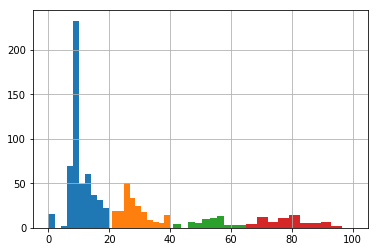

In [27]:
# With the help of the histogram it is possible to analyze ticket prices in order to define the classes and purchasing power of passengers

train_data['Fare'].hist(range = (0,20))
train_data['Fare'].hist(range = (21,40))
train_data['Fare'].hist(range = (41,65))
train_data['Fare'].hist(range = (65,100))

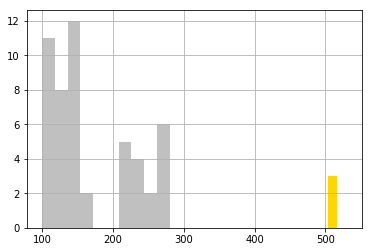

In [28]:
train_data['Fare'].hist(range = (100,280), color="silver")
train_data['Fare'].hist(range = (400,530), color="gold")

In [29]:
# To simplify the data, i separate the ticket price class this form:

# 0 - (0$) - FreePassengers(Probabily workers)
# 1 - (1-20$) - LowClass
# 2 - (21-99) - MediumClass
# 3 - (>100) - HighClass

# Defining the intervals in which the Fare classes will be added in train data
fare_bins_train = [0, 1, 21, 100,550]
fare_labels_train = ["Free", "Low Class", "Medium Class", "High Class"]

#Converting the numerical variable ["Fare"] to categorical variable in train data
train_data['Fare'] = pd.cut(train_data['Fare'], bins = fare_bins_train, labels = fare_labels_train, 
                            right=True, include_lowest=True)

# Defining the intervals in which the Fare classes will be added in test data
fare_bins_test = [0,1,21,100,550]
fare_labels_test = ["Free", "Low Class", "Medium Class", "High Class"]

#Converting the numerical variable ["Fare"], to categorical variable in test data
test_data['Fare'] = pd.cut(test_data['Fare'], bins = fare_bins_test, labels = fare_labels_test, 
                          right=True, include_lowest= True)

In [30]:
# Before treatment
train_data['Fare'].sample(3)

158       Low Class
751       Low Class
690    Medium Class
Name: Fare, dtype: category
Categories (4, object): [Free < Low Class < Medium Class < High Class]

In [31]:
# Now, i'll use again LabelEncoder in variable ['Fare'] to transform in number.

# 0 - (0$) - FreePassengers(Probabily workers)
# 1 - (1-20$) - LowClass
# 2 - (21-99) - MediumClass
# 3 - (>100) - HighClass

train_data['Fare'] = conv.fit_transform(train_data['Fare'])
test_data['Fare'] = conv.fit_transform(test_data['Fare'])

In [32]:
# After treatment
train_data['Fare'].sample(3)

331    3
780    2
213    2
Name: Fare, dtype: int32

In [33]:
# Now the dataset is ready to work
train_data.sample(15)

,Survived,Pclass,Sex,Age,Fare,Embarked,FamilyNumber
285,0,3,1,1,2,0,1
858,1,3,0,4,2,0,4
813,0,3,0,0,3,2,7
12,0,3,1,4,2,2,1
683,0,3,1,3,3,2,8
397,0,2,1,1,3,2,1
283,1,3,1,4,2,2,1
379,0,3,1,4,2,2,1
575,0,3,1,4,2,2,1
265,0,2,1,1,2,2,1


In [34]:
# Export to xlsx
table = pd.ExcelWriter('outputTitanic.xlsx')
data_analysis.to_excel(table, 'Sheet1', index= False)
table.save()

In [35]:
train_data2 = train_data.copy()
test_data2 = test_data.copy()

## 3) Predict the survivors

In [36]:
# Defining the X and Y train
X_train = train_data2.drop(['Survived'], axis=1)
Y_train = train_data2['Survived']

In [37]:
# Defining the X and Y test
X_test = test_data2
Y_test = test_Yreal

In [38]:
# The data set is already slit, so now, i will import de models.

from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import explained_variance_score

In [39]:
# SVC

model_SVC = SVC()
model_SVC.fit(X_train, Y_train.ravel())
SVC_predict = model_SVC.predict(X_test)

acc_SVC = accuracy_score(test_Yreal, SVC_predict)
cm_SVC = confusion_matrix(test_Yreal, SVC_predict)
print(cm_SVC)

[[254  12]
 [  8 144]]


C:\Users\Marcos Rocha\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [40]:
# Decision Tree

model_DT = DecisionTreeClassifier()
model_DT.fit(X_train, Y_train.ravel())
DT_predict = model_SVC.predict(X_test)

acc_DT = accuracy_score(test_Yreal, DT_predict)
cm_DT = confusion_matrix(test_Yreal, DT_predict)
print(cm_DT)

[[254  12]
 [  8 144]]


In [41]:
model_KNN = KNeighborsClassifier()
model_KNN.fit(X_train, Y_train.ravel())
KNN_predict = model_KNN.predict(X_test)

acc_KNN = accuracy_score(test_Yreal, KNN_predict)
cm_KNN = confusion_matrix(test_Yreal, KNN_predict)
print(cm_KNN)

[[229  37]
 [ 31 121]]


In [42]:
model_NB = GaussianNB()
model_NB.fit(X_train, Y_train.ravel())
NB_predict = model_NB.predict(X_test)

acc_NB = accuracy_score(test_Yreal, NB_predict)
cm_NB = confusion_matrix(test_Yreal, NB_predict)
print(cm_NB)

[[225  41]
 [  6 146]]


In [43]:
model_SGD = SGDClassifier()
model_SGD.fit(X_train, Y_train.ravel())
SGD_predict = model_SGD.predict(X_test)

acc_SGD = accuracy_score(test_Yreal, SGD_predict)
cm_SGD = confusion_matrix(test_Yreal, SGD_predict)
print(cm_SGD)

[[  3 263]
 [  0 152]]


C:\Users\Marcos Rocha\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


In [44]:
GB_model = GradientBoostingClassifier()
GB_model.fit(X_train, Y_train.ravel())
GB_predict = GB_model.predict(X_test)

acc_GB = accuracy_score(test_Yreal, GB_predict)
cm_GB = confusion_matrix(test_Yreal, GB_predict)
print(cm_GB)

[[256  10]
 [ 20 132]]


In [45]:
RF_model = RandomForestClassifier()
RF_model.fit(X_train, Y_train.ravel())
RF_predict = RF_model.predict(X_test)

acc_RF = accuracy_score(test_Yreal, RF_predict)
cm_RF = confusion_matrix(test_Yreal, RF_predict)
print(cm_RF)

[[241  25]
 [ 32 120]]


C:\Users\Marcos Rocha\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [46]:
AD_model = AdaBoostClassifier()
AD_model.fit(X_train, Y_train.ravel())
AD_predict = AD_model.predict(X_test)

acc_AD = accuracy_score(test_Yreal, AD_predict)
cm_AD = confusion_matrix(test_Yreal, AD_predict)
print(cm_AD)

[[247  19]
 [  8 144]]


In [47]:
BC_model = BaggingClassifier()
BC_model.fit(X_train, Y_train.ravel())
BC_predict = BC_model.predict(X_test)

acc_BC = accuracy_score(test_Yreal, BC_predict)
cm_BC = confusion_matrix(test_Yreal, BC_predict)
print(cm_BC)

[[243  23]
 [ 38 114]]


In [48]:
### Results

In [49]:
results = [acc_AD,acc_BC,acc_DT,acc_GB,acc_KNN,acc_NB,acc_RF,acc_SGD,acc_SVC]
cm2 = [cm_AD,cm_BC,cm_DT,cm_GB,cm_KNN,cm_NB,cm_RF,cm_SGD,cm_SVC]
models = ["AdaBoostClassifier", "BaggingClassifier", "DecisionTreeClassifier", "GaussianNB", "KNeighborsClassifier", 
         "Naive Bayes", "Random Forest", "SGDClassifier", "Support Vector Classifier"]
data = [{'AdaBoostClassifier':acc_AD, 'BaggingClassifier':acc_BC,"DecisionTreeClassifier":acc_DT, "GaussianNB":acc_GB, "KNeighborsClassifier":acc_KNN, "Naive Bayes":acc_NB, 
        "Random Forest": acc_RF, "SGDClassifier": acc_SGD, "Support Vector Classifier":acc_SVC}]
tableone = pd.DataFrame(data)
tableone.index = ['Accuracy']


In [50]:
tableone

,AdaBoostClassifier,BaggingClassifier,DecisionTreeClassifier,GaussianNB,KNeighborsClassifier,Naive Bayes,Random Forest,SGDClassifier,Support Vector Classifier
Accuracy,0.935407,0.854067,0.952153,0.92823,0.837321,0.88756,0.863636,0.370813,0.952153


In [ ]:
# The best was SUPPORT VECTOR Classifier !!!

In [ ]:
predictioN = SVC_predict
gender_submission = pd.read_csv("gender_submission.csv")

In [ ]:
submissionKaggle = pd.DataFrame({'PassengerId':gender_submission['PassengerId'],'Survived':predictioN})
filename = 'SupportVectorClassifier.csv'
submissionKaggle.to_csv(filename,index=False)
print('Saved file: ' + filename)